In [85]:
pip install wordcloud


   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   --- ----------------------------------- 30.7/301.4 kB 660.6 kB/s eta 0:00:01
   --- ----------------------------------- 30.7/301.4 kB 660.6 kB/s eta 0:00:01
   ---------------- ----------------------- 122.9/301.4 kB 1.0 MB/s eta 0:00:01
   --------------------- ---------------- 174.1/301.4 kB 952.6 kB/s eta 0:00:01
   ------------------------------- -------- 235.5/301.4 kB 1.0 MB/s eta 0:00:01
   ---------------------------------------  297.0/301.4 kB 1.1 MB/s eta 0:00:01
   -------------------------------------- 301.4/301.4 kB 980.3 kB/s eta 0:00:00


In [86]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as p1
import seaborn as sb
import nltk
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import pickle
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\himan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# EXPLORATORY DATA ANALYSIS

In [87]:
df = pd.read_csv(r"Dataset/amazon_alexa.tsv" , delimiter = "\t" , quoting = 3)

In [88]:
df.head(5)

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [89]:
print("Shape" , df.shape)

Shape (3150, 5)


In [90]:
print("Feature Names :" , df.columns.values)

Feature Names : ['rating' 'date' 'variation' 'verified_reviews' 'feedback']


In [91]:
df.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    1
feedback            0
dtype: int64

In [92]:
# printing the null record

df[df['verified_reviews'].isna() == True]


,rating,date,variation,verified_reviews,feedback
473,2,29-Jun-18,White,NaN,0


In [93]:
df.dropna(inplace = True)

In [94]:
df.shape

(3149, 5)

In [95]:
df['length'] =  df['verified_reviews'].apply(len)

In [96]:
df.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1,197
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1,174
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [97]:
df.dtypes

rating               int64
date                object
variation           object
verified_reviews    object
feedback             int64
length               int64
dtype: object

## "Rating" Column Analysis

In [98]:
print(f"Rating value count : \n{df['rating'].value_counts()}")

Rating value count : 
rating
5    2286
4     455
1     161
3     152
2      95
Name: count, dtype: int64


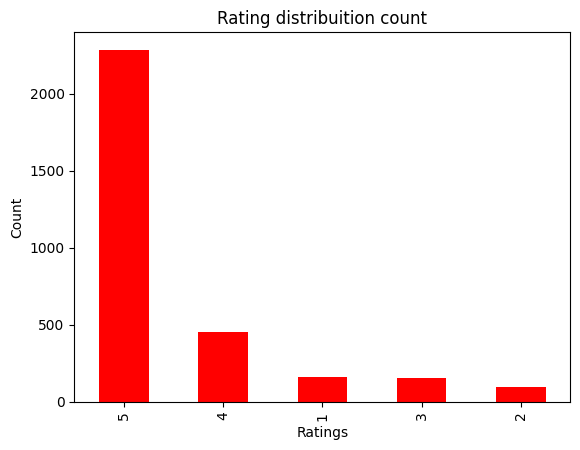

In [99]:
df['rating'].value_counts().plot.bar(color = 'red')
p1.title("Rating distribuition count")
p1.xlabel("Ratings")
p1.ylabel("Count")
p1.show()

## Rating value Count by percentage

In [100]:
percentage_distribution = round(df['rating'].value_counts()/df.shape[0]*100,2)

In [101]:
print("Percentage distribution of Rating : " , percentage_distribution) 

Percentage distribution of Rating :  rating
5    72.59
4    14.45
1     5.11
3     4.83
2     3.02
Name: count, dtype: float64


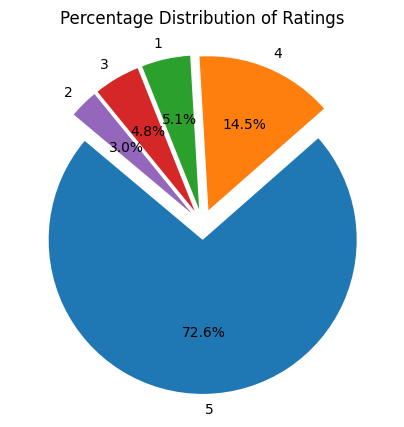

In [102]:
explode = [0.1] * len(percentage_distribution)  

# Plotting the pie chart
p1.figure(figsize=(5, 5))
p1.pie(
    percentage_distribution,
    labels=percentage_distribution.index,
    autopct='%1.1f%%',
    startangle=140,
    explode=explode
)
p1.title('Percentage Distribution of Ratings')
p1.show()

## "Feedback" Column Analysis

In [103]:
print(f"Feedback value count : \n{df['feedback'].value_counts()}")

Feedback value count : 
feedback
1    2893
0     256
Name: count, dtype: int64


In [104]:
feedback_0 = df[df['feedback'] == 0].iloc[1]['verified_reviews']
print(feedback_0)

Sound is terrible if u want good music too get a bose


In [105]:
feedback_1 = df[df['feedback'] == 1].iloc[1]['verified_reviews']
print(feedback_1)

Loved it!


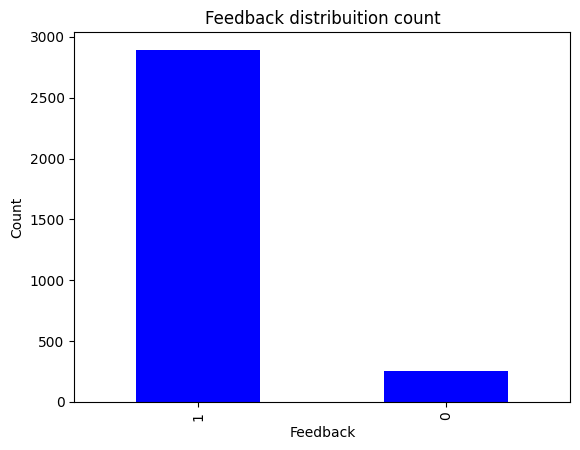

In [106]:
df['feedback'].value_counts().plot.bar(color = 'blue')
p1.title("Feedback distribuition count")
p1.xlabel("Feedback")
p1.ylabel("Count")
p1.show()

## Percentage distribuiton

In [107]:
percentage_distribution_feedback = round(df['feedback'].value_counts()/df.shape[0]*100,2)
print(percentage_distribution_feedback)

feedback
1    91.87
0     8.13
Name: count, dtype: float64


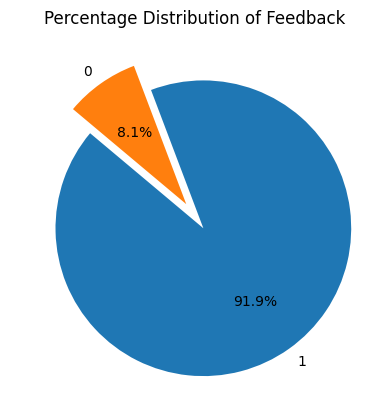

In [108]:
explode = [0.1] * len(percentage_distribution_feedback)  

p1.pie(
    percentage_distribution_feedback,
    labels=percentage_distribution_feedback.index,
    autopct='%1.1f%%',
    startangle=140,
    explode=explode
)
p1.title('Percentage Distribution of Feedback')
p1.show()

In [109]:
# feedback 0

df[df['feedback'] == 0]['rating'].value_counts()

rating
1    161
2     95
Name: count, dtype: int64

In [110]:
# feedback 1

df[df['feedback'] == 1]['rating'].value_counts()

rating
5    2286
4     455
3     152
Name: count, dtype: int64

## "Variation" Column analysis

In [111]:
print(f"Feedback value count : \n{df['variation'].value_counts()}")


Feedback value count : 
variation
Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
Sandstone Fabric                 90
White                            90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: count, dtype: int64


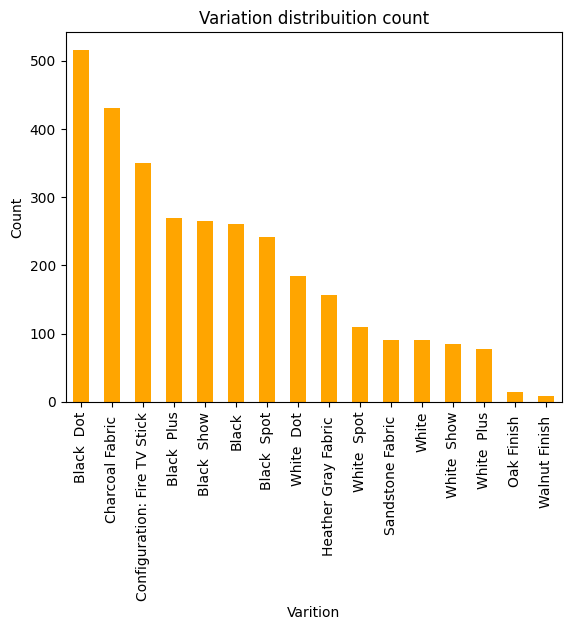

In [112]:
df['variation'].value_counts().plot.bar(color = 'orange')
p1.title("Variation distribuition count")
p1.xlabel("Varition")
p1.ylabel("Count")
p1.show() 

In [113]:
percentage_distribution_variation = round(df['variation'].value_counts()/df.shape[0]*100,2)
print(percentage_distribution_variation)

variation
Black  Dot                      16.39
Charcoal Fabric                 13.66
Configuration: Fire TV Stick    11.11
Black  Plus                      8.57
Black  Show                      8.42
Black                            8.29
Black  Spot                      7.65
White  Dot                       5.84
Heather Gray Fabric              4.99
White  Spot                      3.46
Sandstone Fabric                 2.86
White                            2.86
White  Show                      2.70
White  Plus                      2.48
Oak Finish                       0.44
Walnut Finish                    0.29
Name: count, dtype: float64


In [114]:
df.groupby('variation')['rating'].mean()

variation
Black                           4.233716
Black  Dot                      4.453488
Black  Plus                     4.370370
Black  Show                     4.490566
Black  Spot                     4.311203
Charcoal Fabric                 4.730233
Configuration: Fire TV Stick    4.591429
Heather Gray Fabric             4.694268
Oak Finish                      4.857143
Sandstone Fabric                4.355556
Walnut Finish                   4.888889
White                           4.166667
White  Dot                      4.423913
White  Plus                     4.358974
White  Show                     4.282353
White  Spot                     4.311927
Name: rating, dtype: float64

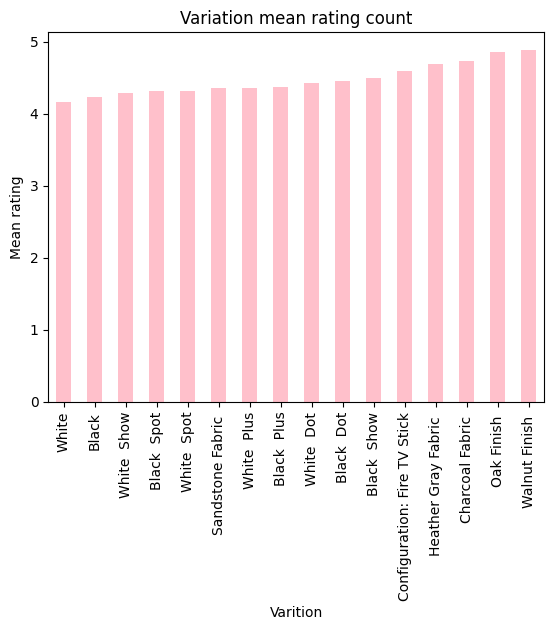

In [115]:
df.groupby('variation')['rating'].mean().sort_values().plot.bar(color = 'pink')
p1.title("Variation mean rating count")
p1.xlabel("Varition")
p1.ylabel("Mean rating")
p1.show() 

In [116]:
cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(df.verified_reviews)

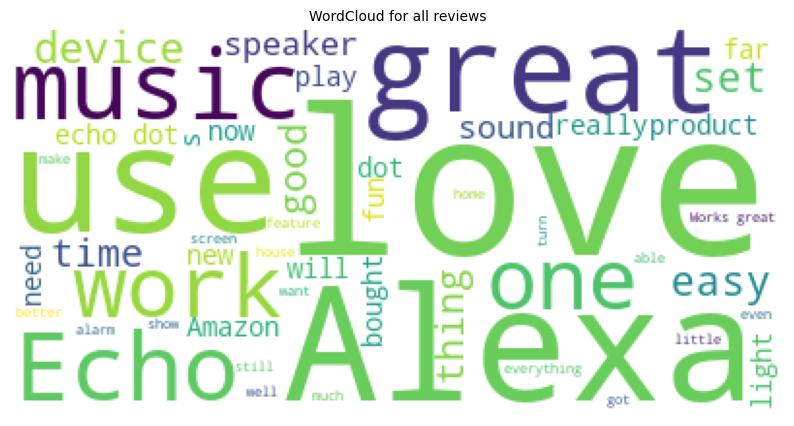

In [118]:
# Combining all reviews
reviews = " ".join([review for review in df['verified_reviews']])

# Initialize wordcloud object
wc = WordCloud(background_color = 'white' , max_words = 50)

# Geenerate and plot wordcloud
p1.figure(figsize = (10 , 10))
p1.imshow(wc.generate(reviews))
p1.title('WordCloud for all reviews' , fontsize = 10)
p1.axis('off')
p1.show()

In [127]:
# Seprating wordcloud for negative and positive feedbacks 

neg_reviews = " ".join([review for review in df[df['feedback'] == 0]['verified_reviews']])
neg_reviews = neg_reviews.lower().split()

pos_reviews = " ".join([review for review in df[df['feedback'] == 1]['verified_reviews']])
pos_reviews = pos_reviews.lower().split()

#Finding words from reviews which are present in that feedback category only
unique_negative = [x for x in neg_reviews if x not in pos_reviews]
unique_negative = " ".join(unique_negative)

unique_positive = [x for x in pos_reviews if x not in neg_reviews]
unique_positive = " ".join(unique_positive)

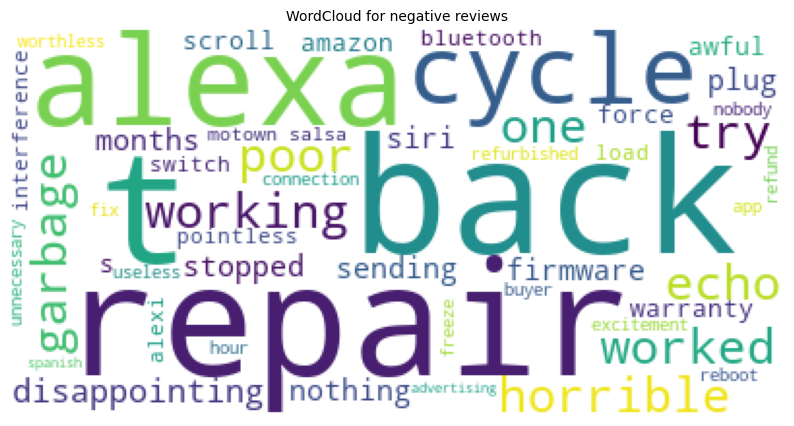

In [131]:
# Negative WordCloud

wc = WordCloud(background_color = 'white' , max_words = 50)

# Geenerate and plot wordcloud
p1.figure(figsize = (10 , 10))
p1.imshow(wc.generate(unique_negative))
p1.title('WordCloud for negative reviews' , fontsize = 10)
p1.axis('off')
p1.show()

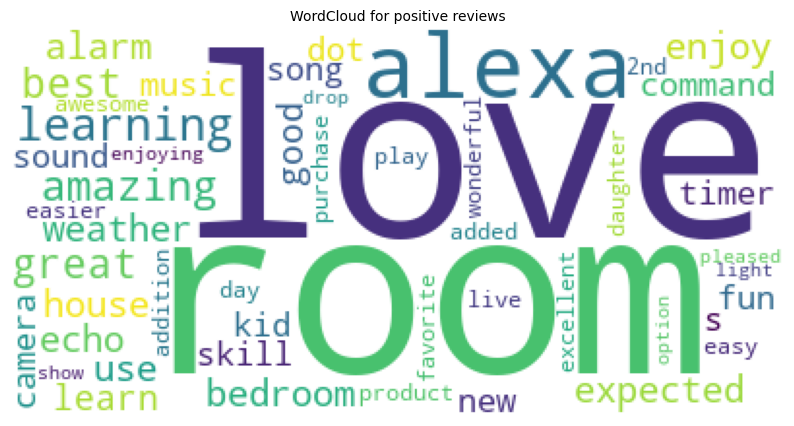

In [132]:
# Positive WordCloud

wc = WordCloud(background_color = 'white' , max_words = 50)

# Geenerate and plot wordcloud
p1.figure(figsize = (10 , 10))
p1.imshow(wc.generate(unique_positive))
p1.title('WordCloud for positive reviews' , fontsize = 10)
p1.axis('off')
p1.show()

In [133]:
corpus = []

stemmer = PorterStemmer()

for i in range(0 , df.shape[0]):
    review = re.sub('[^a-zA-Z]' , ' ' , df.iloc[i]['verified_reviews'])
    review = review.lower().split()
    review = [stemmer.stem(word) for word in review if not word in STOPWORDS]
    review = ' '.join(review)
    corpus.append(review)

In [136]:
## Using Count vectorizer to create a bag of words

cv = CountVectorizer(max_features = 2500)

#storing independent and dependent varibales

X = cv.fit_transform(corpus).toarray()
y = df['feedback'].values

In [168]:
#Saving the Count Vectorizer
pickle.dump(cv, open('Models/countVectorizer.pkl', 'wb'))

In [138]:
X.shape

(3149, 2500)

In [139]:
y.shape

(3149,)

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 15)

print(f"X train: {X_train.shape}")
print(f"y train: {y_train.shape}")
print(f"X test: {X_test.shape}")
print(f"y test: {y_test.shape}")

X train: (2204, 2500)
y train: (2204,)
X test: (945, 2500)
y test: (945,)


In [141]:

print(f"X train max value: {X_train.max()}")
print(f"X test max value: {X_test.max()}")

X train max value: 12
X test max value: 10


In [142]:
scaler = MinMaxScaler()

X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.transform(X_test)

In [144]:
#Saving the scaler model
pickle.dump(scaler, open('Models/scaler.pkl', 'wb'))

In [145]:
#Fitting scaled X_train and y_train on Random Forest Classifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train_scl, y_train)

RandomForestClassifier()

In [146]:
#Accuracy of the model on training and testing data
 
print("Training Accuracy :", model_rf.score(X_train_scl, y_train))
print("Testing Accuracy :", model_rf.score(X_test_scl, y_test))

Training Accuracy : 0.9945553539019963
Testing Accuracy : 0.9428571428571428


In [147]:
#Predicting on the test set
y_preds = model_rf.predict(X_test_scl)


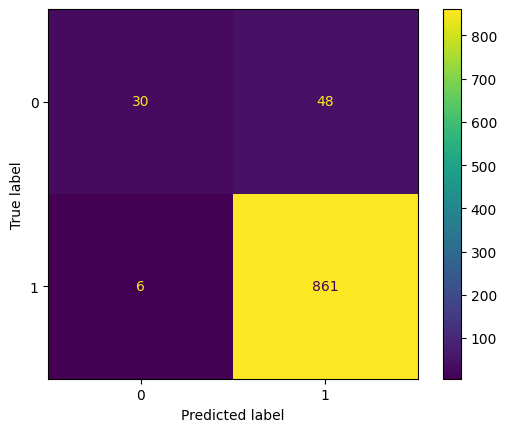

In [149]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_preds)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_rf.classes_)
cm_display.plot()
p1.show()

### K-fold cross validation

In [150]:
accuracies = cross_val_score(estimator = model_rf, X = X_train_scl, y = y_train, cv = 10)

print("Accuracy :", accuracies.mean())
print("Standard Variance :", accuracies.std())

Accuracy : 0.9323981900452489
Standard Variance : 0.007416358714129882


In [152]:
# Applying grid search to get the optimal parameters on random forest

params = {
    'bootstrap': [True],
    'max_depth': [80, 100],
    'min_samples_split': [8, 12],
    'n_estimators': [100, 300]
}

In [153]:
cv_object = StratifiedKFold(n_splits = 2)

grid_search = GridSearchCV(estimator = model_rf, param_grid = params, cv = cv_object, verbose = 0, return_train_score = True)
grid_search.fit(X_train_scl, y_train.ravel())

GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'max_depth': [80, 100],
                         'min_samples_split': [8, 12],
                         'n_estimators': [100, 300]},
             return_train_score=True)

In [154]:
#Getting the best parameters from the grid search
print("Best Parameter Combination : {}".format(grid_search.best_params_))

Best Parameter Combination : {'bootstrap': True, 'max_depth': 80, 'min_samples_split': 12, 'n_estimators': 100}


In [155]:
print("Cross validation mean accuracy on train set : {}".format(grid_search.cv_results_['mean_train_score'].mean()*100))
print("Cross validation mean accuracy on test set : {}".format(grid_search.cv_results_['mean_test_score'].mean()*100))
print("Accuracy score for test set :", accuracy_score(y_test, y_preds))

Cross validation mean accuracy on train set : 96.744555353902
Cross validation mean accuracy on test set : 92.14496370235935
Accuracy score for test set : 0.9428571428571428


### XgBoost

In [156]:
model_xgb = XGBClassifier()
model_xgb.fit(X_train_scl, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [157]:
#Accuracy of the model on training and testing data
 
print("Training Accuracy :", model_xgb.score(X_train_scl, y_train))
print("Testing Accuracy :", model_xgb.score(X_test_scl, y_test))

Training Accuracy : 0.971415607985481
Testing Accuracy : 0.9417989417989417


In [158]:
y_preds = model_xgb.predict(X_test)

[[ 31  47]
 [ 13 854]]


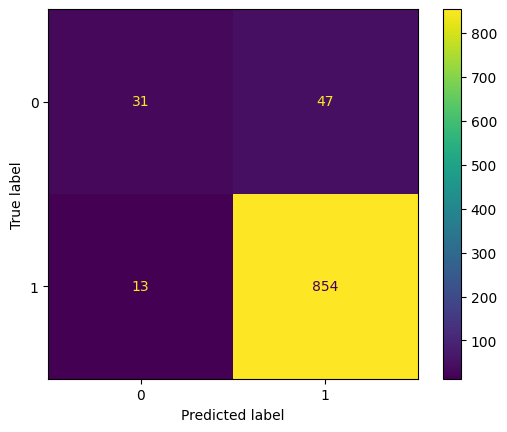

In [160]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_preds)
print(cm)

cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_xgb.classes_)
cm_display.plot()
p1.show()

In [161]:
#Saving the XGBoost classifier
pickle.dump(model_xgb, open('Models/model_xgb.pkl', 'wb'))

### Decision Tree Classifier


In [162]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train_scl, y_train)

DecisionTreeClassifier()

In [163]:
#Accuracy of the model on training and testing data
 
print("Training Accuracy :", model_dt.score(X_train_scl, y_train))
print("Testing Accuracy :", model_dt.score(X_test_scl, y_test))

Training Accuracy : 0.9945553539019963
Testing Accuracy : 0.9216931216931217


In [164]:
y_preds = model_dt.predict(X_test)

[[ 40  38]
 [ 66 801]]


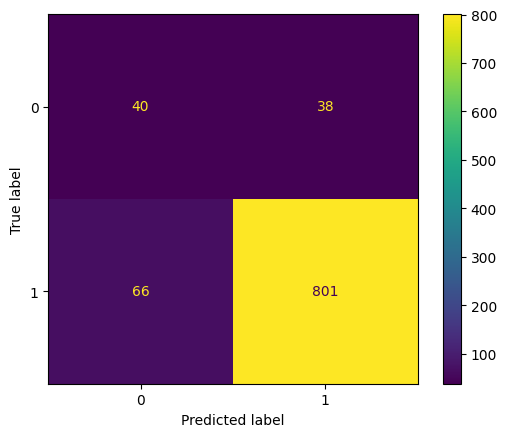

In [167]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_preds)
print(cm)

cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_dt.classes_)
cm_display.plot()
p1.show()